In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Use latex
# -- if you don't have pdflatex installed just comment this stuff out
import matplotlib as mpl
import shutil

# find the path to pdflatex executable
pdflatex_path = shutil.which("pdflatex")

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 16,  # default for all
    "axes.titlesize": 20,  # fontsize of the axes title
    "axes.labelsize": 18,  # fontsize of the x and y labels
    "xtick.labelsize": 16,  # fontsize of the tick labels
    "ytick.labelsize": 16,  # fontsize of the tick labels
})



In [7]:
# Load Data
import json
fit_path = 'ordered_fitness.json'
one_path = 'ordered_ones.json'

with open(fit_path, 'r') as f:
    fitness = json.load(f)
    
with open(one_path, 'r') as f:
    leadone = json.load(f)    

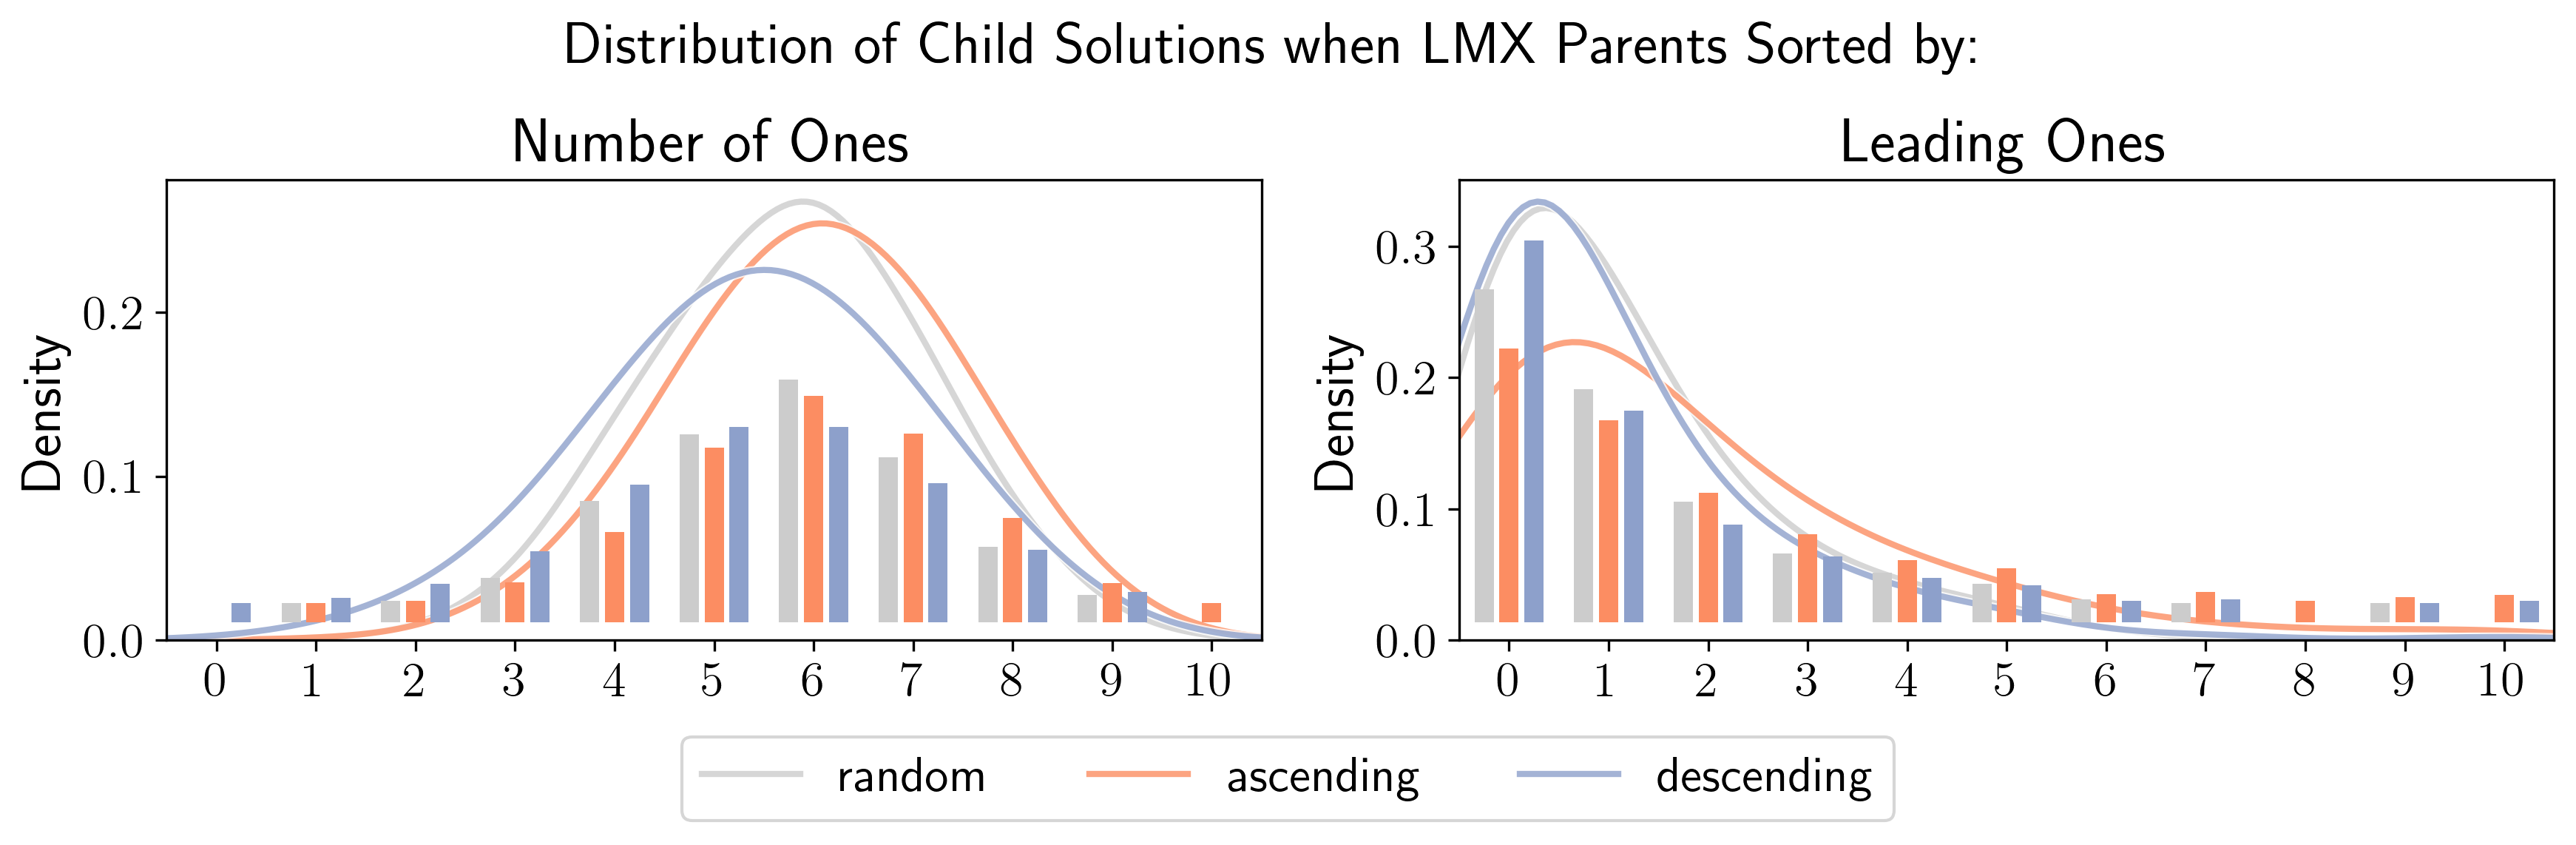

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=300)

# calculate step size for y values based on maximum possible count
datasets = {'fitness': fitness, 'leadone': leadone}
titles = ["Number of Ones", "Leading Ones"]
for i, (dataset, child) in enumerate(datasets.items()):
    palette = sns.color_palette("Set2", len(child))
    palette[0] = tuple([0.8, 0.8, 0.8, 0.8])  # Change the first color to gray with an opacity of 0.5
    max_count = max([len(v) for v in child.values()])

    # plot the KDE
    for idx, (key, values) in enumerate(child.items()):
        # First plot that serves as a border
        sns.kdeplot(values, bw_adjust=2, color='white', lw=3, ax=ax[i], alpha=0.8, zorder=1)

        # Second plot that overlays the first one
        sns.kdeplot(values, bw_adjust=2, color=palette[idx], lw=2, ax=ax[i], label=key, alpha=0.8, zorder=1)

    ax[i].set_xlim([-0.5,10.5])
    ax[i].set_title(titles[i])
    ax[i].set_xticks(np.arange(11))

    y_min, y_max = ax[i].get_ylim()
    offset = 0.25

    # generate an evenly spaced y-coordinate array
    y_coord_array = np.linspace(y_min + y_max*0.06, y_max * 1.66, max_count)

    # plot the scatter plots
    for idx, (key, values) in enumerate(child.items()):
        # get unique values and their counts
        unique_values, counts = np.unique(values, return_counts=True)

        # plot the data points
        for val, count in zip(unique_values, counts):
            y_values = y_coord_array[:count]  # get the first 'count' y-coordinates
            offset_values = [-offset, 0, offset]
            x_values = np.full(count, val) + offset_values[idx % 3]
            ax[i].scatter(x_values, y_values, color=palette[idx], alpha=1.0, 
                          s=40, marker='s', edgecolors='k', linewidths=0.0, zorder=2)


# Creating legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.suptitle("Distribution of Child Solutions when LMX Parents Sorted by:", y=0.93)
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the padding
plt.show()

# Save as a PGF or PDF file
fig.savefig("sorted_lmx.pgf")
fig.savefig("sorted_lmx.pdf")
fig.savefig("sorted_lmx.png")